# Analisi di un catalogo di ammassi di galassie

L'esercizio consiste nell'analizzare un catalogo di ammassi di galassie (`euclid_clusters.csv`) con caratteristiche simili a quelli che saranno osservati dalla missione Euclid. Il catalogo fornisce la massa (in masse solari) per ogni ammasso, per tre bin di redshift, ed il volume di universo associato a ciascun bin (in ${Mpc}^3/h^3$).

### Pacchetti e librerie utilizzati

In [3]:
import pandas as pd
from colossus.cosmology import cosmology
from colossus.lss import mass_function
import matplotlib.pyplot as plt

## Parte uno: visualizzazione e analisi dei dati

_Scaricare il catalogo degli ammassi di galassie e analizzarne i dati, prestando particolare attenzione alla distribuzione delle masse degli ammassi. Si suggerisce di utilizzare scale logaritmiche per verificare la distribuzione dei dati._

Per prima cosa importo i dati del catalogo su un dataframe. 

In [5]:
# importing data-frame 
euclid_clusters = pd.read_csv("euclid_clusters.csv", index_col = 0)

# viewing imported data
euclid_clusters.groupby('z').head()

,mass,z,vol
0,1.060613e+14,0.506,1.479387e+10
1,1.097076e+14,0.506,1.479387e+10
2,1.588869e+14,0.506,1.479387e+10
3,1.336345e+14,0.506,1.479387e+10
4,3.078288e+14,0.506,1.479387e+10
168897,1.122773e+14,1.019,4.783826e+10
168898,1.382684e+14,1.019,4.783826e+10
168899,2.561905e+14,1.019,4.783826e+10
168900,1.418248e+14,1.019,4.783826e+10
168901,1.452855e+14,1.019,4.783826e+10


Successivamente analizzo i dati relativi alle masse all'interno del dataframe tramite i comandi `.groupby()` e `.describe()`; in questo modo ricavo le medie, le deviazioni standard, i percentili e valori massimi e minimi delle masse per ogni bin di redshift.

In [7]:
# analyzing data-frame
euclid_clusters.groupby('z')['mass'].describe()

,count,mean,std,min,25%,50%,75%,max
z,,,,,,,,
0.506,168897.0,1.754502e+14,1.022009e+14,1.000004e+14,1.162374e+14,1.417421e+14,1.942476e+14,2.231156e+15
1.019,142007.0,1.520161e+14,6.478489e+13,1.000036e+14,1.120814e+14,1.307558e+14,1.668826e+14,1.536768e+15
1.500,51733.0,1.370772e+14,4.304113e+13,1.000017e+14,1.093389e+14,1.230673e+14,1.487753e+14,9.605430e+14


Infine rappresento le distribuzioni delle masse tramite degli istogrammi in cui i conteggi seguono una scala logaritmica. Come prima, considero separatamente i tre bin di redshift tramite una tecnica di group-by.

Il **titolo** dei vari istogrammi corrisponde al **redshift** considerato.

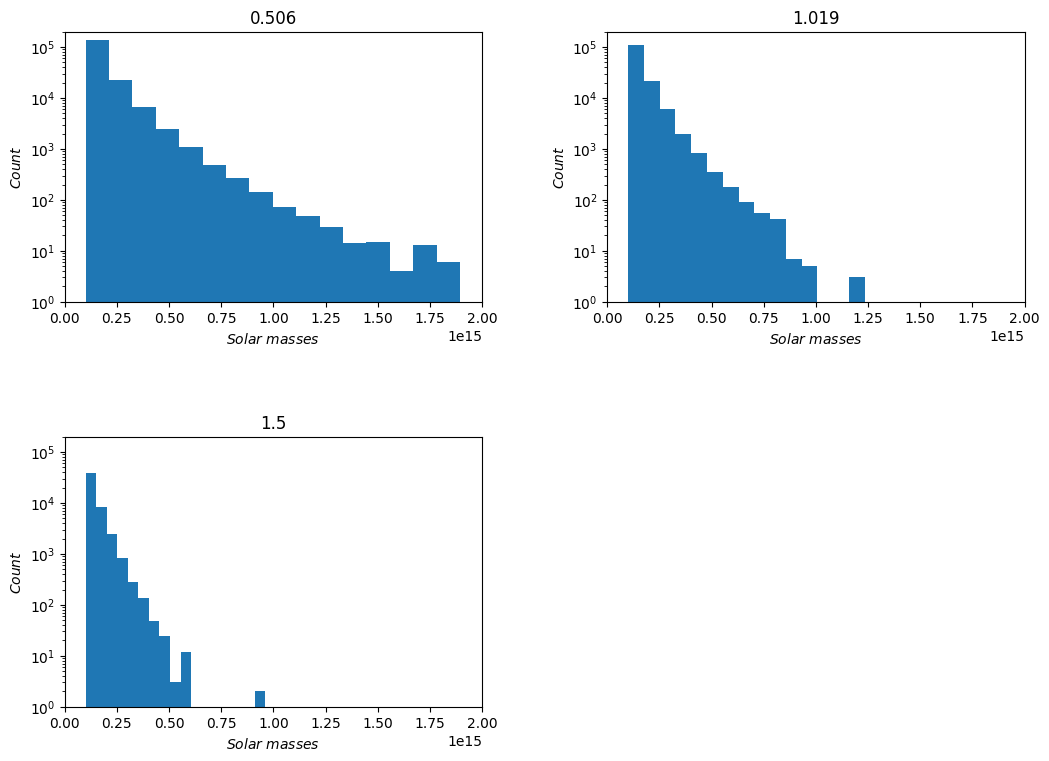

In [36]:
euclid_clusters['den'] = euclid_clusters['mass'].div(euclid_clusters['vol'])
# drawing histograms
axes = euclid_clusters.hist(['mass'], by = 'z', xrot = 0, figsize = (12, 9), bins = 'sturges', log = True)
for ax in axes.flatten():
    ax.set(xlabel = '$Solar\ masses$', xlim = (1, 2e15), 
           ylabel = '$Count$', ylim = (1, 2e5))

## Parte due: analisi della Halo Mass Function (HMF)
_Analizzare ogni bin di redshift individualmente e confrontare la distribuzione osservata delle masse degli ammassi (Halo Mass Function, HMF) con la distribuzione teorica predetta da diversi parametri cosmologici per verificarne la dipendenza._

Come suggerito, utilizzo la libreria Colossus. <br/>
Inizializzo i parametri cosmologici (`params`) e imposto la cosmologia come nel frammento di codice dato.

In [11]:
# initializing cosmological parameters
params = {'flat': True, 'H0': 67.77, 'Om0': 0.31, 'Ob0': 0.049, 'sigma8': 0.81, 'ns': 0.96}

# setting cosmology
cosmology.addCosmology('myCosmo', params)
cosmo = cosmology.setCosmology('myCosmo')

Per lavorare con ogni bin separatamente suddivido il dataframe originale in tre sottinsiemi in base al redshift:
 - `z1` = 0.506;
 - `z2` = 1.019;
 - `z3` = 1.500.

Per la suddivisione utilizzo gli indici ricavati nella prima parte del notebook:

In [13]:
# creating subframes
z1 = euclid_clusters.iloc[:168897]
z2 = euclid_clusters.iloc[168897:310904]
z3 = euclid_clusters.iloc[310904:]

La libreria Colossus mi permette di calcolare le distribuzioni cumulative della densità di aloni osservati (`mfunc`), dato un redshift z. La densità è espressa in masse solari per unità di volume osservato (in ${Mpc}^3/h^3$) per bin logaritmico naturale di massa. <br/>
Nell'immagine si possono visualizzare le predizioni per ogni redshift.

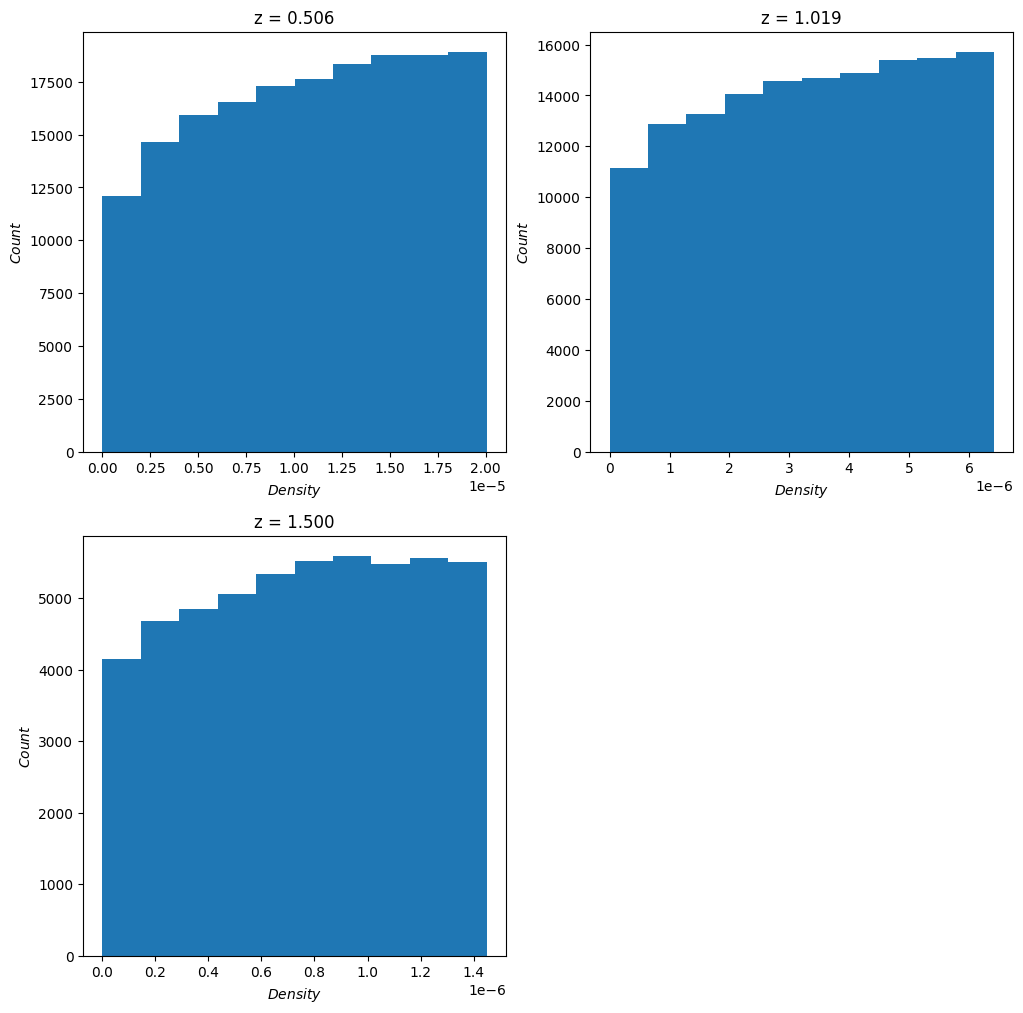

In [38]:
# calculating theoretical cumulative distributions
mfunc1 = mass_function.massFunction(z1['mass'], 0.506, mdef = 'vir', model = 'despali16', q_out = 'dndlnM')
mfunc2 = mass_function.massFunction(z2['mass'], 1.019, mdef = 'vir', model = 'despali16', q_out = 'dndlnM')
mfunc3 = mass_function.massFunction(z3['mass'], 1.500, mdef = 'vir', model = 'despali16', q_out = 'dndlnM')

# sketching the cumulative distributions
fig, axes = plt.subplots(2, 2, figsize = (12, 12))
axes[0, 0].hist(mfunc1)
axes[0, 0].set_title('z = 0.506')
axes[0, 1].hist(mfunc2)
axes[0, 1].set_title('z = 1.019')
axes[1, 0].hist(mfunc3)
axes[1, 0].set_title('z = 1.500')
fig.delaxes(axes[1, 1])
for ax in axes.flat:
    ax.set(xlabel = '$Density$', ylabel='$Count$')

## Parte tre: inferenza bayesiana sui parametri cosmologici

### Modelli flat $\Lambda CDM$
_Supponendo che le predizioni teoriche della HMF siano in accordo con i dati osservati, si può procedere con una fase di inferenza bayesiana sui parametri cosmologici._ 

_Analizzare inizialmente i tre bin di redshift individualmente. Ha senso combinarli per un'analisi congiunta?_